**Telco Churn Classification Project**

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
from pydataset import data
from math import sqrt
from scipy import stats

#Acquire functions
from acquire import get_connection

#Prepare function
#from prepare import 

#sklearn for machine learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.tree import export_graphviz
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import env
import explore
import prepare
from prepare import prep_telco

#import graphviz
#from graphviz import Graph

____________________________________________________________________________________________

**Project Planning**

Create README.md with data dictionary, project and business goals, come up with initial hypotheses.

Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.

Clean and prepare data for run through of the pipeline. Create a function to automate the preparation, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.

Define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.

Establish a baseline accuracy and document.

Train three different classification models.

Evaluate models on train and validate datasets.

Choose the model with that performs the best and evaluate that single model on the test dataset.

Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.

Document conclusions, takeaways, and next steps in the Final Report Notebook.

____________________________________________________________________________________________

**Description**
Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook report.

Create modules (acquire.py, prepare.py) that make your process repeateable.

Construct a model to predict customer churn using classification techniques.

Deliver a 5 minute presentation consisting of a high-level notebook walkthrough using your Jupyter Notebook from above; your presentation should be appropriate for your target audience.

Answer panel questions about your code, process, findings and key takeaways, and model.


____________________________________________________________________________________________

**Business Goals**

Find drivers for customer churn at Telco. Why are customers churning?

Construct a ML classification model that accurately predicts customer churn.

Document your process well enough to be presented or read like a report.

____________________________________________________________________________________________

**Executive Summary - Conclusions & Next Steps**

I found that all of the classification models I created DecisionTree, RandomForest, and KNeighborsthey all predicted the churn of customers with similar accuracy with KNN performing the best, using the features gender, contract_type, partner, dependents, phone_service,multiple_lines, internet_service_type and payment_type.

I chose my KNN model as my best model with a 78% accuracy rate for predicting my target value, churn. This model outperformed my baseline score of 73% accuracy, so it has value.
Some initial exploration and statistical testing revealed that low tenure can be linked to high churn, senior citizens churn more often than non-seniors and fiber optics subscribers churn much more than any other internet type subscriber so these would be the areas I would focus on with more time that might increase the model accuracy predictions.

Takeaways from heatmaps -month-to-month customers churn the most of contract_type approximately 43% -Fiber optics has the highest rate of churn at 43% churning of this internet_service_type -Electronic check has the highest churn  at 46% -senior_citizens churn at a much higher rate than other customers 44% compared to 23% for overall customers

Countplot Takeaways -tenure is by far highest at one month and by far least at 72 months -customers with the lowest monthly bills are churning the most -fiber optics service type churns at a rate by far higher than the other two -those customers without partners churn at a much higher rate -customers with dependents churn at a slightly higher rate -seniors churn at a much higher rate than other customers -customers who pay with electronic check churn near as much as all the other 3 payment types combined

Takeaway from pairplot -customers churn more often at the lower tenures -customers churn the lesast with high monthly bills and high tenure -senior citizens with all types of tenure churn at a similar rate unlike the rest of the population that mostly churns at a lower tenure

Violinplot takeaways -churn is much higher at the lowest tenure -churn is higher for customers with higher monthly charges

____________________________________________________________________________________________

   **Acquire**

In [2]:
#acquire the data

df = pd.read_sql('''SELECT *
FROM customers
JOIN contract_types USING(contract_type_id)
JOIN internet_service_types USING(internet_service_type_id)
JOIN payment_types USING(payment_type_id);''', get_connection("telco_churn"))

In [3]:
#check it out
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
#get the shape
df.shape

(7043, 24)

In [5]:
#return a summary of statistics
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [6]:
#plot distribution of individual variables

<AxesSubplot:xlabel='monthly_charges'>

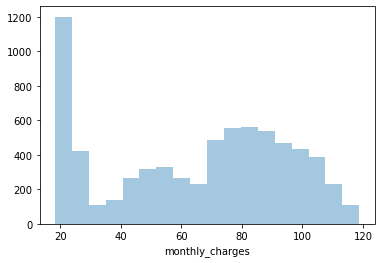

In [7]:
sns.distplot( a=df["monthly_charges"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='tenure'>

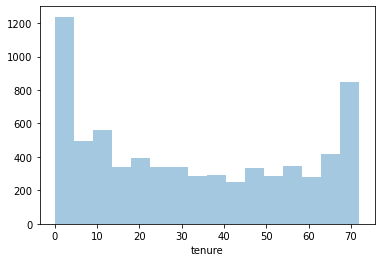

In [8]:
sns.distplot( a=df["tenure"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='total_charges'>

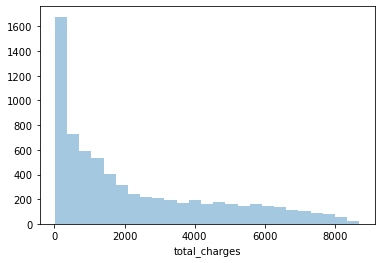

In [13]:
sns.distplot( a=df["total_charges"], hist=True, kde=False, rug=False )

**Acquire Takeaways**

I wrote a sql query to acquire my data from the Codeup database.

I'm importing my get_connection function from my acquire.py file 

I'm bringing in 7043 rows and 24 columns on my initial acquisition.

____________________________________________________________________________________________

**Prepare**

In [12]:
# This function takes in a dataframe and preps it according to my specifications
prep_telco(df)

In [14]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [15]:
train, validate, test = train_validate_test_split(df, target='churn')
train.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
6096,Female,0,Yes,No,70,Yes,No,No,19.45,1303.5,No,Two year,None,Bank transfer (automatic)
1603,Male,0,Yes,Yes,15,Yes,No,Yes,69.50,1071.4,No,Month-to-month,DSL,Mailed check


In [16]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 14)
validate -> (1688, 14)
test -> (1407, 14)


**Prepare Takeaways**

I checked for Null values; this is a squeaky clean dataset, so I don't have to deal with missing values.

I dropped all the columns that were id's there were 3, I also dropped all the additional services since I'm not intersted in exploring those.

I found 11 missing values for customers who never paid their bill in total_charges so I deleted those rows.

Next I changed total_charges to numeric from object so I could plot it in explore.

On initial viewing of distributions of features, I can see that monthly_charges looks normally distributed other than the huge pile-up at tenure month 1, tenure distribution has bimodal distribution which could correlate with churn or no churn I'll check that out in explore, and total charges is right-skewed.

I'll split my data into train, validate, and test datasets, stratifying my churn column.

____________________________________________________________________________________________

**Explore Data**

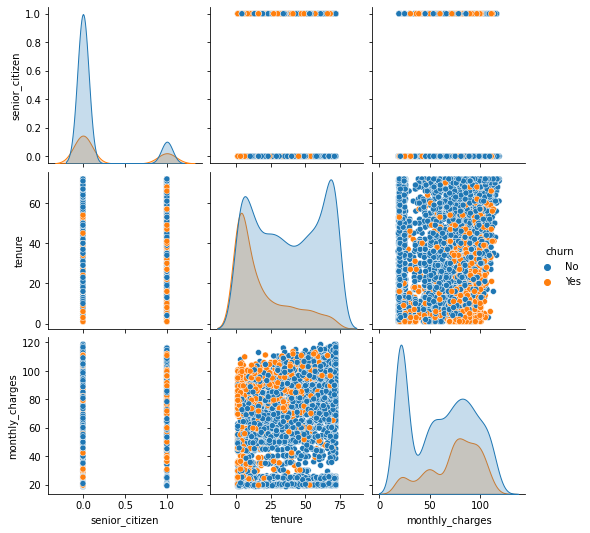

In [17]:
sns.pairplot(train, hue='churn')
plt.show()

**Takeaway from pairplot**

-customers churn more often at the lower tenures

-customers churn the lesast with high monthly bills and high tenure

-senior citizens with all types of tenure churn at a similar rate unlike the rest of the population that mostly churns at a lower tenure

In [18]:
# this will make my charts bigger
sns.set(rc={'figure.figsize':(11.7,8.27)})

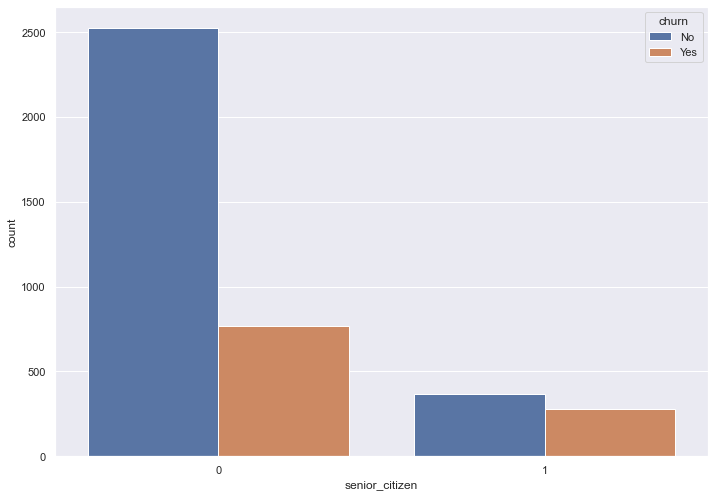

In [19]:
# plot senior_citizen by churn
sns.countplot(data=train, x='senior_citizen', hue='churn')
plt.show()

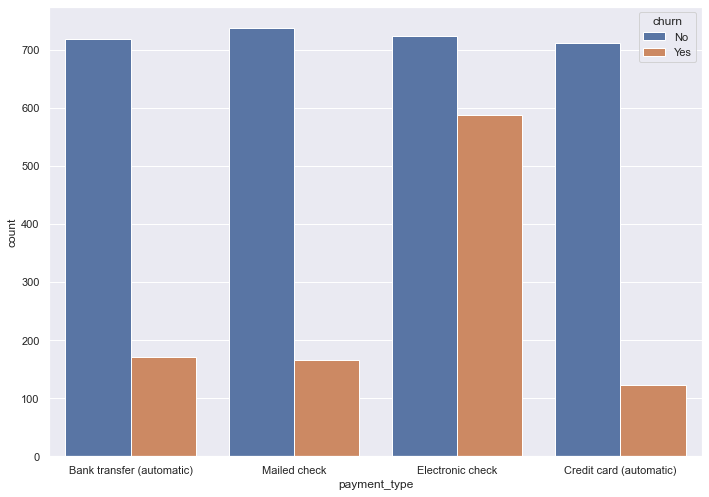

In [20]:
# plot payment_type by churn
sns.countplot(data=train, x='payment_type', hue='churn')
plt.show()

**Countplot Takeaways**

-seniors churn at a much higher rate than other customers

-customers who pay with electronic check churn near as much as all the other 3 payment types combined

In [21]:
#create a heatmap payment_type and churn
pd.crosstab(train.payment_type, train.churn, margins=True).style.background_gradient(cmap='YlOrRd')

churn,No,Yes,All
payment_type,,,
Bank transfer (automatic),719,170,889
Credit card (automatic),712,122,834
Electronic check,723,588,1311
Mailed check,737,166,903
All,2891,1046,3937


In [22]:
#create a heatmap senior_citizen and churn
pd.crosstab(train.senior_citizen, train.churn, margins=True).style.background_gradient(cmap='YlOrRd')

churn,No,Yes,All
senior_citizen,,,
0,2524,766,3290
1,367,280,647
All,2891,1046,3937


**Takeaways from heatmaps**
-Electronic check has the highest churn 
-senior_citizens churn more than non-senior_citizens  

____________________________________________________________________________________________

**Statistical Testing**

Hypothesis 1: Let's see if there is a relationship between payment type and churn.

alpha = .05

$H_0$: There is no relationship between payment type and churn, they are independent. 

$H_a$: There is a relationship between payment type and churn, they are dependent on each other.


**Baseline Accuracy**

In [23]:
baseline = train.churn.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 73.43%.


In [24]:
# make dummy variable for senior_citizen and payment_type

dummy_df = pd.get_dummies(df[['senior_citizen','payment_type']])
dummy_df.head()

,senior_citizen,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,1
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [25]:
# concatenate the dummy_df dataframe above with the original df 

df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,senior_citizen,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check,0,0,0,0,1


In [26]:
# test hypothesis 1

In [27]:
#set alpha to .05
a = .05

In [28]:
observed = pd.crosstab(train.churn, train.payment_type)
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,719,712,723,737
Yes,170,122,588,166


In [29]:
chi2, p ,degf, expected = stats.chi2_contingency(observed)
chi2, p

(341.8332932781657, 8.748945233390548e-74)

In [30]:
if p < a:
    print("Reject null hypothesis, payment type and churn are not independent")
else:
    print("Fail to reject null hypothesis, payment type and churn are independent, let's keep finding features that are not.")

Reject null hypothesis, payment type and churn are not independent


In [31]:
#test hypothesis 2

In [32]:
#set alpha to .05
a = .05

In [33]:
observed = pd.crosstab(train.churn, train.senior_citizen)
observed

senior_citizen,0,1
churn,,
No,2524,367
Yes,766,280


In [34]:
chi2, p ,degf, expected = stats.chi2_contingency(observed)
chi2, p

(109.76347560274587, 1.1040911367340458e-25)

if p < a:
    print("Reject null hypothesis, payment type and churn are not independent")
else:
    print("Fail to reject null hypothesis, senior citizen status and churn are independent, let's keep finding features that are not.")

Stats testing Takeaway

**Model & Evaluate**

In [36]:
#copy the train dataset
train_encoded = train.copy()

In [37]:
train_encoded.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
6096,Female,0,Yes,No,70,Yes,No,No,19.45,1303.5,No,Two year,None,Bank transfer (automatic)
1603,Male,0,Yes,Yes,15,Yes,No,Yes,69.50,1071.4,No,Month-to-month,DSL,Mailed check
5350,Female,1,Yes,No,52,Yes,Yes,Yes,109.10,5647.95,No,Month-to-month,Fiber optic,Electronic check
2068,Male,0,No,No,39,No,No phone service,Yes,40.60,1494.5,No,Month-to-month,DSL,Electronic check
6366,Female,0,Yes,No,32,Yes,No,No,19.30,593.2,No,One year,None,Mailed check


In [38]:
encoded_columns = ['gender','contract_type','partner','dependents','phone_service','multiple_lines','internet_service_type','payment_type']

In [39]:
#make dummy variables
dummy_df = pd.get_dummies(train_encoded[encoded_columns], dummy_na=False, drop_first=[True, True])

In [40]:
# put it all back together
train_encoded = pd.concat([train_encoded, dummy_df], axis=1)

In [41]:
# drop initial column since we have that information now
train_encoded = train_encoded.drop(columns=encoded_columns)

In [42]:
# do the same for validate and test sets

In [43]:
# copy the validate dataset
validate_encoded = validate.copy()

In [44]:
#make dummy variables
dummy_df = pd.get_dummies(validate_encoded[encoded_columns], dummy_na=False, drop_first=[True, True])

In [45]:
# put it all back together
validate_encoded = pd.concat([validate_encoded, dummy_df], axis=1)

In [46]:
# drop initial column since we have that information now
validate_encoded = validate_encoded.drop(columns=encoded_columns)

In [47]:
# copy the test dataset
test_encoded = test.copy()

In [48]:
#make dummy variables
dummy_df = pd.get_dummies(test_encoded[encoded_columns], dummy_na=False, drop_first=[True, True])

In [49]:
# put it all back together
test_encoded = pd.concat([test_encoded, dummy_df], axis=1)

In [50]:
# drop initial column since we have that information now
test_encoded = test_encoded.drop(columns=encoded_columns)

In [51]:
train_encoded.drop(columns='paperless_billing',inplace=True)

In [52]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,contract_type_One year,contract_type_Two year,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6096,0,70,19.45,1303.5,No,0,0,1,1,0,1,0,0,0,1,0,0,0
1603,0,15,69.50,1071.4,No,1,0,0,1,1,1,0,0,0,0,0,0,1
5350,1,52,109.10,5647.95,No,0,0,0,1,0,1,0,1,1,0,0,1,0
2068,0,39,40.60,1494.5,No,1,0,0,0,0,0,1,0,0,0,0,1,0
6366,0,32,19.30,593.2,No,0,1,0,1,0,1,0,0,0,1,0,0,1


In [53]:
validate_encoded.drop(columns='paperless_billing',inplace=True)

In [54]:
test_encoded.drop(columns='paperless_billing',inplace=True)

In [57]:
#didn't work
#train_encoded.replace(to_replace = {'churn': {'no': 0, 'yes': 1}}, inplace=True)

In [59]:
train_encoded.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,contract_type_One year,contract_type_Two year,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6096,0,70,19.45,1303.5,No,0,0,1,1,0,1,0,0,0,1,0,0,0
1603,0,15,69.50,1071.4,No,1,0,0,1,1,1,0,0,0,0,0,0,1
5350,1,52,109.10,5647.95,No,0,0,0,1,0,1,0,1,1,0,0,1,0
2068,0,39,40.60,1494.5,No,1,0,0,0,0,0,1,0,0,0,0,1,0
6366,0,32,19.30,593.2,No,0,1,0,1,0,1,0,0,0,1,0,0,1


In [60]:
# create X & y version of encoded_train, where y is a series with just the target variable and X are all the features. 

X_train = train_encoded.drop(columns=['churn'])
y_train = train_encoded.churn

X_validate = validate_encoded.drop(columns=['churn'])
y_validate = validate_encoded.churn

X_test = test_encoded.drop(columns=['churn'])
y_test = test_encoded.churn

In [64]:
validate_encoded

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,contract_type_One year,contract_type_Two year,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
611,0,72,92.00,6782.15,No,1,0,1,1,0,1,0,1,0,0,1,0,0
1155,0,67,75.10,5064.45,No,0,1,0,1,0,1,0,1,0,0,0,0,1
4916,1,4,70.20,280.35,No,1,0,0,1,0,1,0,0,1,0,0,1,0
2816,0,72,113.65,8124.2,No,0,0,1,1,0,1,0,1,1,0,1,0,0
5301,0,42,79.90,3313.4,No,1,0,0,0,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,29,75.35,2243.9,No,1,1,0,0,0,1,0,0,0,0,0,0,0
2053,0,4,51.75,201.1,Yes,1,0,0,0,0,1,0,1,0,0,1,0,0
1992,0,16,84.90,1398.25,No,1,0,0,1,1,1,0,1,0,0,0,1,0
2271,0,1,44.80,44.8,No,1,0,0,0,0,1,0,0,0,0,0,1,0


In [67]:
y_train.replace(to_replace=['yes','no'],value=[1,0], inplace=True)

In [68]:
y_train.head()

6096    No
1603    No
5350    No
2068    No
6366    No
Name: churn, dtype: object

In [77]:
#Model #1

In [61]:
#create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [62]:
# fit the model
clf = clf.fit(X_train, y_train)

In [63]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [69]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [70]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[2704,  187],
       [ 633,  413]])

In [71]:
y_train.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [72]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2704,187
Yes,633,413


In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      2891
         Yes       0.69      0.39      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.79      0.77      3937



In [ ]:
#test on validate set

In [74]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [75]:
#produce predictions
y_pred = clf.predict(X_validate)

#compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.93      0.87      1239
         Yes       0.68      0.41      0.51       449

    accuracy                           0.79      1688
   macro avg       0.75      0.67      0.69      1688
weighted avg       0.78      0.79      0.77      1688



In [76]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [ ]:
#Model #2

In [78]:
#create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [79]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [80]:
print(rf.feature_importances_)

[1.39567208e-02 2.44412142e-01 9.29402601e-02 1.20525776e-01
 2.54693348e-05 6.29995131e-02 1.36161481e-01 1.30707539e-03
 3.61120912e-03 1.50779628e-03 2.96378788e-03 2.70339100e-03
 1.42331546e-01 6.74358811e-02 2.32792436e-03 9.81760780e-02
 6.61394911e-03]


In [81]:
# classify
y_pred = rf.predict(X_train)

In [82]:
# estimate probability
y_pred_proba = rf.predict_proba(X_train)

In [83]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [84]:
print(confusion_matrix(y_train, y_pred))

[[2733  158]
 [ 660  386]]


In [85]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.95      0.87      2891
         Yes       0.71      0.37      0.49      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [88]:
#time to validate

In [89]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


In [90]:
# Model #3

In [91]:
# create knn 
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [92]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
# make predictions
y_pred = knn.predict(X_train)

In [94]:
# estimate probability of churn
y_pred_proba = knn.predict_proba(X_train)

In [95]:
#evaluate model, find accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [96]:
print(confusion_matrix(y_train, y_pred))

[[2659  232]
 [ 473  573]]


In [97]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88      2891
         Yes       0.71      0.55      0.62      1046

    accuracy                           0.82      3937
   macro avg       0.78      0.73      0.75      3937
weighted avg       0.81      0.82      0.81      3937



In [98]:
#time to validate model
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.77


In [ ]:
#Testing the test set on my best model Decision Tree
actual_test = y_test
predicted_test = clf.predict(X_test)
print(classification_report(actual_test, predicted_test))

Modeling Takeaways
After evaluating all three models on train and validate, the Decision Tree and Random Forest were very close in performance, but the Decision Tree had a little better recall so I chose that as my best model.  Now I will evaluate my best model on the test data.

In [99]:
proba_test = clf.predict_proba(X_test)

In [100]:
proba_df = pd.DataFrame(proba_test, columns=clf.classes_.tolist())
proba_df.head()

,No,Yes
0,0.836158,0.163842
1,0.851124,0.148876
2,0.894665,0.105335
3,0.980333,0.019667
4,0.894665,0.105335


In [101]:
reset_test = test.reset_index()
reset_test.head()

,index,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2897,Female,0,Yes,Yes,64,Yes,Yes,No,113.35,7222.75,No,One year,Fiber optic,Electronic check
1,6407,Female,0,No,No,2,Yes,No,No,20.45,34.8,No,One year,None,Mailed check
2,6272,Male,0,Yes,No,25,Yes,No,Yes,20.95,495.15,No,One year,None,Bank transfer (automatic)
3,5638,Female,0,Yes,No,72,Yes,No,No,20.50,1502.25,No,Two year,None,Credit card (automatic)
4,903,Male,0,No,No,56,Yes,Yes,Yes,64.65,3665.55,No,One year,DSL,Bank transfer (automatic)


In [102]:
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,index,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,No,Yes
0,2897,Female,0,Yes,Yes,64,Yes,Yes,No,113.35,7222.75,No,One year,Fiber optic,Electronic check,0.836158,0.163842
1,6407,Female,0,No,No,2,Yes,No,No,20.45,34.8,No,One year,None,Mailed check,0.851124,0.148876
2,6272,Male,0,Yes,No,25,Yes,No,Yes,20.95,495.15,No,One year,None,Bank transfer (automatic),0.894665,0.105335
3,5638,Female,0,Yes,No,72,Yes,No,No,20.50,1502.25,No,Two year,None,Credit card (automatic),0.980333,0.019667
4,903,Male,0,No,No,56,Yes,Yes,Yes,64.65,3665.55,No,One year,DSL,Bank transfer (automatic),0.894665,0.105335


In [103]:
test_proba_df['predicted'] = clf.predict(X_test)
test_proba_df.head(20)

,index,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,No,Yes,predicted
0,2897,Female,0,Yes,Yes,64,Yes,Yes,No,113.35,7222.75,No,One year,Fiber optic,Electronic check,0.836158,0.163842,No
1,6407,Female,0,No,No,2,Yes,No,No,20.45,34.8,No,One year,None,Mailed check,0.851124,0.148876,No
2,6272,Male,0,Yes,No,25,Yes,No,Yes,20.95,495.15,No,One year,None,Bank transfer (automatic),0.894665,0.105335,No
3,5638,Female,0,Yes,No,72,Yes,No,No,20.50,1502.25,No,Two year,None,Credit card (automatic),0.980333,0.019667,No
4,903,Male,0,No,No,56,Yes,Yes,Yes,64.65,3665.55,No,One year,DSL,Bank transfer (automatic),0.894665,0.105335,No
5,3306,Male,0,Yes,No,67,Yes,No,Yes,100.90,6733.15,No,One year,Fiber optic,Credit card (automatic),0.836158,0.163842,No
6,1740,Male,0,No,No,2,Yes,No,No,44.65,74.9,Yes,Month-to-month,DSL,Mailed check,0.619145,0.380855,No
7,4037,Male,0,No,No,1,Yes,No,Yes,89.90,89.9,Yes,Month-to-month,Fiber optic,Electronic check,0.115108,0.884892,Yes
8,2165,Male,0,No,No,2,Yes,No,Yes,46.00,84.5,Yes,Month-to-month,DSL,Credit card (automatic),0.619145,0.380855,No
9,58,Male,0,No,No,70,No,No phone service,No,48.40,3442.8,No,Two year,DSL,Bank transfer (automatic),0.980333,0.019667,No


In [104]:
test_proba_df.to_csv('predictions.csv')